<a href="https://colab.research.google.com/github/anujshetty/SearchAndResQ/blob/main/Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

from Gridworld import Gridworld
from utils import visualize_grid, policy_score, simulate_policy
from __future__ import unicode_literals
from Learning import QLearning, EpsilonGreedyExploration, FixedPolicy


In [3]:
g_rand = Gridworld(gridworld_length=8, num_obstacles=0,
                 collisionReward= -1, destinationReward= 5, defaultReward= 0, outOfBoundsReward = -1, 
                 failChance= 0, gamma= 1)
eps_greedy_policy =  EpsilonGreedyExploration(0.6, alpha=0.9)
qlearning_model = QLearning(g_rand, 0.2)
print(qlearning_model.Q.shape)
#print(qlearning_model.Q[tuple([0, 0, 0, 0, 0, 0, 0])])

(8, 8, 1, 4)


In [4]:
for i in range(10000):
    g_rand.reset_position()
    simulate_policy(g_rand, policy_type="epsilon-greedy", model=qlearning_model, policy=eps_greedy_policy, 
                    run_to_completion=False, num_iters=5, visualize=False)

Reached destination in 2 iterations
Reached destination in 2 iterations
Reached destination in 1 iterations
Reached destination in 5 iterations
Reached destination in 3 iterations
Reached destination in 4 iterations
Reached destination in 3 iterations
Reached destination in 2 iterations
Reached destination in 4 iterations
Reached destination in 1 iterations
Reached destination in 2 iterations
Reached destination in 4 iterations
Reached destination in 1 iterations
Reached destination in 3 iterations
Reached destination in 1 iterations
Reached destination in 2 iterations
Reached destination in 4 iterations
Reached destination in 2 iterations
Reached destination in 5 iterations
Reached destination in 1 iterations
Reached destination in 5 iterations
Reached destination in 3 iterations
Reached destination in 4 iterations
Reached destination in 1 iterations
Reached destination in 1 iterations
Reached destination in 4 iterations
Reached destination in 5 iterations
Reached destination in 2 ite

In [5]:
learned_policy = FixedPolicy(qlearning_model.extract_policy(), g_rand,qlearning_model)
print(learned_policy.policy)
#print(qlearning_model.Q)

[[[1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [2]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]]]


In [6]:
# reset agent position in existing grid
g_rand.reset_position()

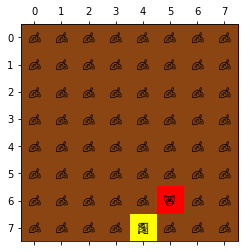

In [7]:
visualize_grid(g_rand)

In [8]:
policy_score_learned = simulate_policy(g_rand, policy_type="fixed", model=None, policy=learned_policy, run_to_completion=True)

Original State: [7, 5, 0]
Action:  l Reward:  5
New State: [7, 4, 0]
Reached destination in 6 iterations


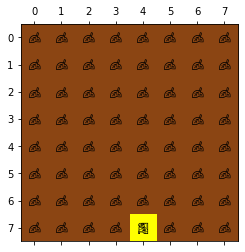

In [9]:
visualize_grid(g_rand)